In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv(url, delim_whitespace=True, names = names)

In [3]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
dataset.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

W zbiorze nie brakuje żadnych wartości, więc nie musimy podejmować żadnych kroków w tym kierunku

In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [8]:
corr = dataset.corr()

In [9]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Text(0.5, 1.0, 'Macierz korelacji')

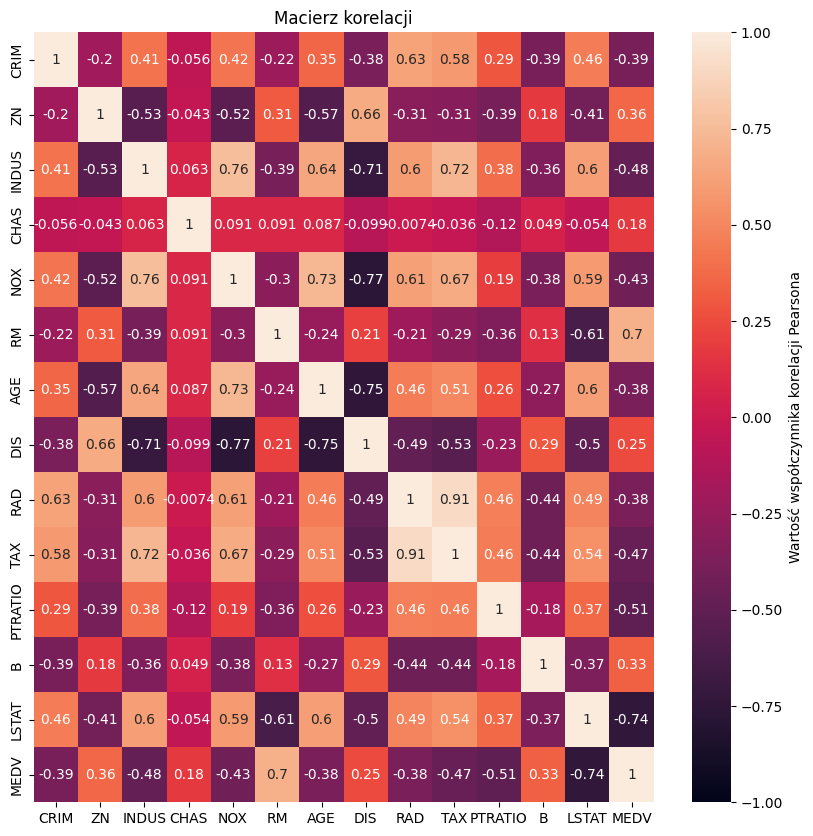

In [10]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True, cbar_kws={'label': 'Wartość współczynnika korelacji Pearsona'}, vmin=-1, vmax=1 )
plt.title('Macierz korelacji')

Wysoka współliniowość(załóżmy, że to większa od 0.7) jest widoczna między zmennymi takimi jak NOX i INUS, DIS i INDUS, TAX i INDUS, DIS i NOX, DIS I AGE, RAD i TAX. Powiniśmy mieć to na uwadzę w kontekście dobierania naszych parametrów do modelii. W tym notatniku nie skupiono się na tym fakcie.

In [22]:
X = dataset.drop('MEDV', axis = 1)
y = dataset['MEDV']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
import xgboost as xgb

In [27]:
xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10,n_estimators = 10)
xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

## GridSearch

In [28]:
from sklearn.model_selection import GridSearchCV
params = {'learning_rate': [0.01, 0.1, 0.3], 'max_depth':[3,5,7], 'n_estimators':[50,100,200]}
xg_reg_2 = xgb.XGBRFRegressor(objective = 'reg:squarederror', colsample_bytree=0.3)
grid = GridSearchCV(estimator = xg_reg_2, param_grid=params, cv = 5, scoring = 'neg_mean_squared_error')
grid.fit(X_train, y_train)
print(f'Best scores {grid.best_score_} using params: { grid.best_params_}')

Best scores -60.96003290281591 using params: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 100}


In [29]:
model = LinearRegression()
param_grid = {
    'fit_intercept': [True, False],
}
grid_LR = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_LR.fit(X_train, y_train)
print(f'Best scores {grid_LR.best_score_} using params: { grid_LR.best_params_}')


Best scores -23.654418270304568 using params: {'fit_intercept': True}


## Ewaluacja modeli

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [31]:
y_pred_lr = lr.predict(X_test)
print('Linear Regression - MSE: ', mean_squared_error(y_test, y_pred_lr))
print('Linear Regression - MAE: ', mean_absolute_error(y_test, y_pred_lr))
print('Linear Regression - R2: ', r2_score(y_test, y_pred_lr))

Linear Regression - MSE:  24.291119474973478
Linear Regression - MAE:  3.189091965887837
Linear Regression - R2:  0.6687594935356326


In [32]:
y_pred_xg = xg_reg.predict(X_test)
print('XGBoost - MSE: ', mean_squared_error(y_test, y_pred_xg))
print('XGBoost - MAE: ', mean_absolute_error(y_test, y_pred_xg))
print('XGBoost - R2: ', r2_score(y_test, y_pred_xg))

XGBoost - MSE:  40.061291602494165
XGBoost - MAE:  4.234852414972642
XGBoost - R2:  0.4537130108927857


In [33]:
xg_reg_GS = xgb.XGBRegressor(objective = 'reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.3, max_depth = 7, alpha = 10,n_estimators = 100)
xg_reg_GS.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [34]:
y_pred_xg = xg_reg_GS.predict(X_test)
print('XGBoost - MSE: ', mean_squared_error(y_test, y_pred_xg))
print('XGBoost - MAE: ', mean_absolute_error(y_test, y_pred_xg))
print('XGBoost - R2: ', r2_score(y_test, y_pred_xg))

XGBoost - MSE:  19.486098802469606
XGBoost - MAE:  2.855503011217304
XGBoost - R2:  0.7342821007901784


In [35]:
lr_GS = LinearRegression(fit_intercept=True)
lr_GS.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Linear Regression - MSE: ', mean_squared_error(y_test, y_pred_lr))
print('Linear Regression - MAE: ', mean_absolute_error(y_test, y_pred_lr))
print('Linear Regression - R2: ', r2_score(y_test, y_pred_lr))

Linear Regression - MSE:  24.291119474973478
Linear Regression - MAE:  3.189091965887837
Linear Regression - R2:  0.6687594935356326


Najlepszy wynik udało się uzyskać używając XGBoosta z hiperparametrami znalezianymi z wykorzystaniem GridSearchCV

## Założenia regresji liniowej

### Założenie liniowości

Odwołując się do wcześniej utworzonej macierzy korelacji to założenie nie jest spełnione. Model ten został stworzony uwzględniając wszsytkie zmienne ze zbioru danych. Współczynnik korelacji Pearsona jest niski(przyjmując założenie, że rozumiemy przez taki niższy niż 0.3) dla cech takich jak CHAS oraz DIS.

### Rozkład błędów jest normalny

In [36]:
residuals = y_test - y_pred_lr

Text(0.5, 1.0, 'Rozkład residuów')

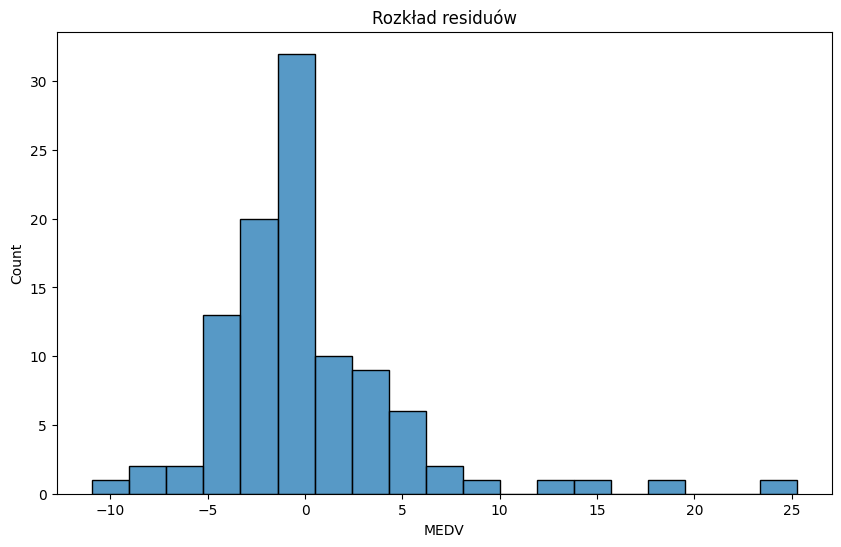

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals)
plt.title('Rozkład residuów')

Rozkład reszt nie jest normalny. Najwięcej obserwaji jest skupionych wokół zera co pokazuje, że model radzi sobie dość dobrze jednak rozkład jest prawoskośny. Sugeruje to, że może istnieć problem z zaniżaniem wartości. Założenie nie jest spełnione.

### Homoskedastyczność

Text(0.5, 1.0, 'Residuals vs Predicted')

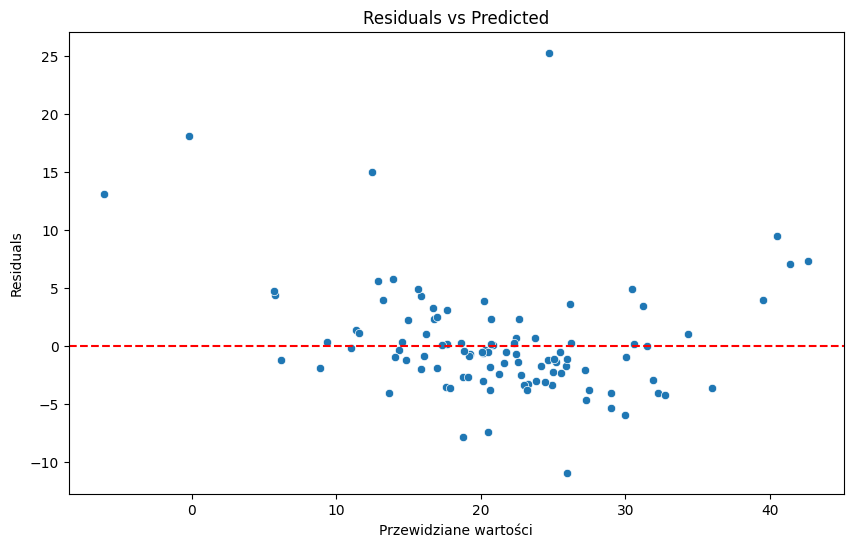

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_lr, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Przewidziane wartości')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')


Większość obserwacji jest skupiona wokół linii jednak pojawiają się też wartości odstające, które nie pozwalają jednoznacznie przyjąć, że założenie o homoskedastyczności jest spełnione.